In [1]:
#importing libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

In [2]:
#to return a list containing the names of the entries in the directory given by path
import os
os.listdir("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place3/data/raster")

['LC08_L2SP_144048_20201228_20210310_02_T1.tar',
 'LC08_L2SP_144048_20201228_20210310_02_T1_ANG.txt',
 'LC08_L2SP_144048_20201228_20210310_02_T1_MD5.txt',
 'LC08_L2SP_144048_20201228_20210310_02_T1_MTL.txt',
 'LC08_L2SP_144048_20201228_20210310_02_T1_MTL.xml',
 'LC08_L2SP_144048_20201228_20210310_02_T1_QA_PIXEL.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_QA_RADSAT.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_SR_B1.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_SR_B2.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_SR_B3.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_SR_B4.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_SR_B5.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_SR_B6.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_SR_B7.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_SR_QA_AEROSOL.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_ST_ATRAN.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_ST_B10.TIF',
 'LC08_L2SP_144048_20201228_20210310_02_T1_ST_CDIST.TIF',
 '

In [3]:
#giving band info
#import bands as separate 1 band raster
#making variables for bands needed for the index equation
Band5 = rasterio.open("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place3/data/raster/LC08_L2SP_144048_20201228_20210310_02_T1_SR_B5.TIF")
Band4 = rasterio.open("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place3/data/raster/LC08_L2SP_144048_20201228_20210310_02_T1_SR_B4.TIF")

In [4]:
#generate nir and red objects as arrays in float64 format
red = Band4.read(1).astype('float64')
nir = Band5.read(1).astype('float64')

In [5]:
a = (2*(nir+1))

In [6]:
b = ((2*nir)+1)

In [7]:
c = (8*(nir-red))

In [8]:
d = b**2

In [9]:
e = (1/2)

In [10]:
f = (d-c)**e

In [11]:
g = (a-f)

In [12]:
msavi2 = e*g

In [13]:
#this is the final msavi2 array result
msavi2

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

In [14]:
##exporting msavi2 image
msaviImage = rasterio.open("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place3/data/msaviPlace3.tif",'w',driver='Gtiff',width=Band4.width, height=Band4.height, count=1, crs=Band4.crs, transform=Band4.transform,dtype='float64')
msaviImage.write(msavi2,1)
msaviImage.close()

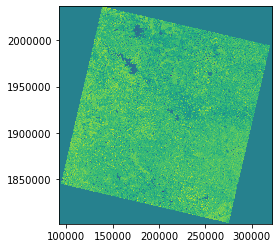

In [15]:
#plotting msavi2 result image
msavi2 = rasterio.open("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place3/data/msaviPlace3.tif")
plot.show(msavi2)

In [16]:
#importing new library to read shapefile
import geopandas as gdp

In [19]:
#polygon info
#polygon of given place
polygon = gdp.read_file("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place3/data/place3_projected.shp")
#to print shapefile's details like number of row, column and the value and name of the columns
print(polygon.shape)
print(polygon.head)

(1, 13)
<bound method NDFrame.head of    OID_   Name FolderPath  SymbolID  AltMode  Base  Clamped  Extruded Snippet  \
0     0  poly4  poly4.kmz         0        0   0.0       -1         0    None   

  PopupInfo  Shape_Leng    Shape_Area  \
0      None     0.00223  3.095921e-07   

                                            geometry  
0  POLYGON ((252372.405 1955063.159, 252373.573 1...  >


<module 'matplotlib.pyplot' from 'C:\\Users\\ASMITA\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

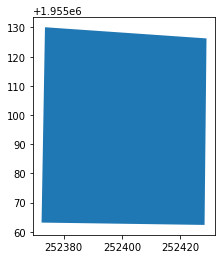

In [20]:
#to plot shapefile
polygon.plot()
plt